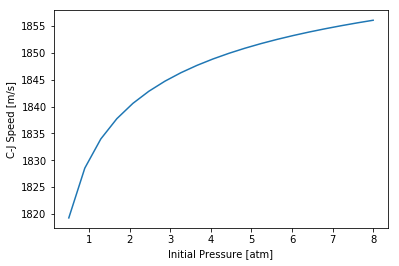

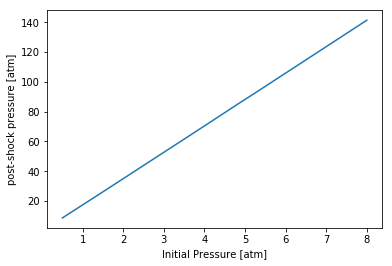

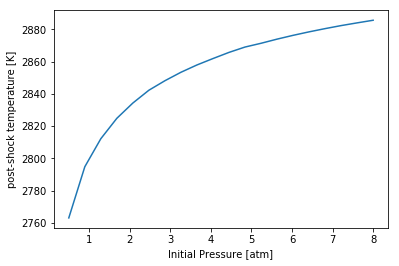

0.050000
0.060000
0.070000
0.080000
0.090000
0.100000
0.110000
0.120000
0.130000
0.140000


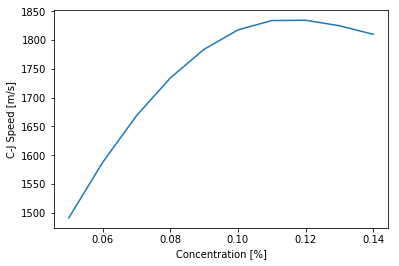

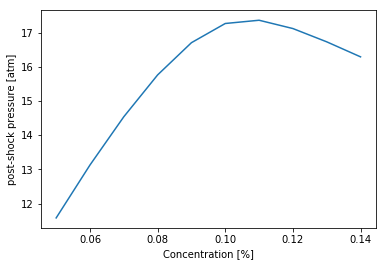

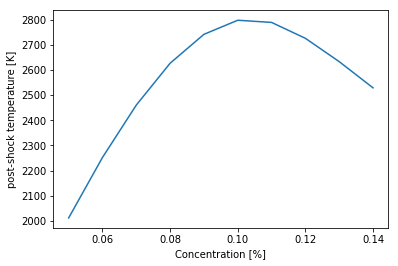

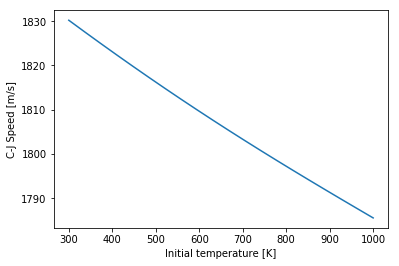

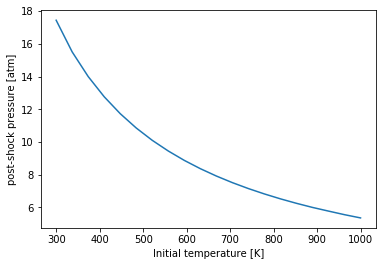

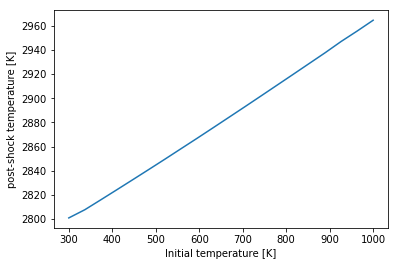

In [19]:

import cantera as ct
import SDToolbox as sd
import matplotlib.pyplot as plt
import numpy as np

P0=1
T0=300
mech = 'gri30.xml'

pressure_array = np.linspace(0.5,8,20)
temperature_array = np.linspace(300,1000,20)

pressure=[]
temperature=[]
speed=[]
C=[]
i=0

for P0 in pressure_array: 

    P0 *= ct.one_atm
    x = 0.1065 # value of max
    a=4.76*x/(1-x)
    q ='O2:1.,N2:3.76,CH4:' + str(a)
    
    
    [cj_speed,R2] = sd.CJspeed(P0, T0, q, mech, 0)
    U1 = cj_speed  #shock speed

    gas = sd.PostShock_eq(cj_speed, P0, T0, q, mech)
    Ps = gas.P/ct.one_atm
    #print i, cj_speed
    C.append(x*100)
    
    pressure.append(gas.P/ct.one_atm)
    temperature.append(gas.T)
    speed.append(cj_speed)
    i=i+1

plt.plot(pressure_array,speed)
plt.xlabel('Initial Pressure [atm]')
plt.ylabel('C-J Speed [m/s]')
plt.show()

plt.plot(pressure_array,pressure)
plt.xlabel('Initial Pressure [atm]')
plt.ylabel('post-shock pressure [atm]')
plt.show()

plt.plot(pressure_array,temperature)
plt.xlabel('Initial Pressure [atm]')
plt.ylabel('post-shock temperature [K]')
plt.show()

pressure=[]
temperature=[]
speed=[]
C=[]
i = 0
P0 = ct.one_atm
#loop that iterate thrue concentrations
while i < 10:
    nCH4 = 0.05 + float(i)/100
    nO2 = (1-nCH4) /4.76
    nN2 = (1-nCH4) *3.76/4.76
    X  =  'CH4:'+str(nCH4)+ ' ' + 'O2:'+str(nO2) + ' ' + 'N2:'+str(nN2)
    C.append(nCH4)
    [cj_speed,R2] = sd.CJspeed(P0, T0, X, mech, 0);
    gas = sd.PostShock_eq(cj_speed, P0, T0, X, mech)
    temperature.append(gas.T)
    pressure.append(gas.P/ct.one_atm)
    speed.append(cj_speed)
    print "%f" % (C[i])
    #print "%s; temperature: %f, pressure: %f, CJspeed: %f" % (X, T2[j], P2[j], speed[j])
    i = i + 1
    
plt.plot(C,speed)
plt.xlabel('Concentration [%]')
plt.ylabel('C-J Speed [m/s]')
plt.show()

plt.plot(C,pressure)
plt.xlabel('Concentration [%]')
plt.ylabel('post-shock pressure [atm]')
plt.show()

plt.plot(C,temperature)
plt.xlabel('Concentration [%]')
plt.ylabel('post-shock temperature [K]')
plt.show()

#intial condidtions for variable initial temperature



pressure=[]
temperature=[]
speed=[]
C=[]
i=0
for T0 in temperature_array:
    P0 = ct.one_atm
    x = 0.1065 # value of max
    a=4.76*x/(1-x)
    q ='O2:1.,N2:3.76,CH4:' + str(a)
    
    
    [cj_speed,R2] = sd.CJspeed(P0, T0, q, mech, 0)
    U1 = cj_speed  #shock speed

    gas = sd.PostShock_eq(cj_speed, P0, T0, q, mech)
    Ps = gas.P/ct.one_atm
    #print i, cj_speed
    C.append(x*100)
    
    pressure.append(gas.P/ct.one_atm)
    temperature.append(gas.T)
    speed.append(cj_speed)
    i=i+1



plt.plot(temperature_array,speed)
plt.xlabel('Initial temperature [K]')
plt.ylabel('C-J Speed [m/s]')
plt.show()

plt.plot(temperature_array,pressure)
plt.xlabel('Initial temperature [K]')
plt.ylabel('post-shock pressure [atm]')
plt.show()

plt.plot(temperature_array,temperature)
plt.xlabel('Initial temperature [K]')
plt.ylabel('post-shock temperature [K]')
plt.show()    
